# Hopfield Network for error detection in patterns

In [ ]:
from imageio import imread
import numpy as np
import matplotlib.pyplot as plt
import copy

from skimage import data, io, filters

from PIL import Image
from skimage.transform import resize
import random
%matplotlib inline

In [ ]:
# Useful functions
def IsScalar(x):
    if type(x) in (list, np.ndarray,):
        return False
    else:
        return True

def Thresh(x):
    if IsScalar(x):
        val = 1 if x>0 else -1
    else:
        val = np.ones_like(x)
        val[x<0] = -1.
    return val

def Hamming(x, y):
    '''
        d = Hamming(x,y)
        
        Hamming distance between two binary vectors x and y.
        It's the number of digits that differ.
        
        Inputs:
          x and y are arrays of binary vectors, and can be either {0,1} or {-1,1}
        
        Output:
          d is the number of places where the inputs differ
    '''
    d = []
    for xx, yy in zip(x,y):
        dd = 0.
        for xxx,yyy in zip(xx,yy):
            if xxx==1 and yyy!=1:
                dd += 1.
            elif yyy==1 and xxx!=1:
                dd += 1.
        d.append(dd)
    return d

def Perturb(x, p=0.1):
    '''
        y = Perturb(x, p=0.1)
        
        Apply binary noise to x. With probability p, each bit will be randomly
        set to -1 or 1.
        
        Inputs:
          x is an array of binary vectors of {-1,1}
          p is the probability of each bit being randomly flipped
        
        Output:
          y is an array of binary vectors of {-1,1}
    '''
    y = copy.deepcopy(x)
    for yy in y:
        for k in range(len(yy)):
            if np.random.rand()<p:
                yy[k] = Thresh(np.random.randint(2)*2-1)
    return y

In [ ]:
def Update(W, x, b):
    xnew = x @ W - b
    return Thresh(xnew)

In [ ]:
letters = []
letters.append(imread('/content/A.png'))
letters.append(imread('/content/B.png'))
letters.append(imread('/content/C.png'))
letters.append(imread('/content/D.png'))
n = len(letters)
N = len(letters[0].flatten())
X = np.zeros((n, N))
for idx,img in enumerate(letters):
    X[idx,:] = Thresh(np.array([img.flatten()-0.5]))

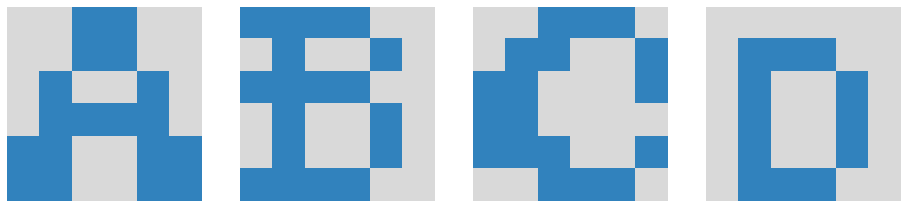

In [ ]:
plt.figure(figsize=(16,4))
for k in range(n):
    plt.subplot(1,n,k+1);
    plt.imshow(np.reshape(X[k], (6,6)), cmap='tab20c_r'); plt.axis('off');

In [ ]:
X@X.T

array([[36.,  0.,  0., 12.],
       [ 0., 36.,  0., 12.],
       [ 0.,  0., 36.,  4.],
       [12., 12.,  4., 36.]])

In [ ]:
# Connection weights and biases
b = np.zeros((1,N))
b = np.sum(X, axis=0) / n
W = ( X.T @ X ) / n - np.eye(N)
W0 = copy.deepcopy(W)

Class 0 with [10.0] errors


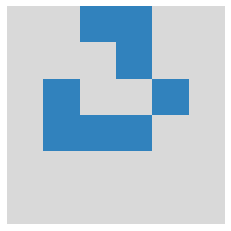

In [ ]:
# Perturbed memory
k = np.random.randint(n)
Y = Perturb( X , p=0.2)
x = Y[k:k+1,]
x[0,24:] = -1.
err = Hamming(x, X[k:k+1,:])
print('Class '+str(k)+' with '+str(err)+' errors')
x_orig = copy.deepcopy(x)
#plt.imshow(np.reshape(x,[28,28]), cmap='gray'); plt.axis('off');
plt.imshow(np.reshape(x,[6,6]), cmap='tab20c_r'); plt.axis('off');

In [ ]:
xs = copy.deepcopy(x_orig)
xa = copy.deepcopy(x)
# Synchronous updating
n_iters = 2
for idx in range(n_iters):
    xs = Update(W, xs, b)

In [ ]:
# Asynchronous updating
n_iters = 10
for count in range(n_iters):
    node_idx = list(range(N))
    np.random.shuffle(node_idx)
    for idx in node_idx:
        ic = xa@W[:,idx] - b[idx]
        xa[0,idx] = Thresh(ic)

In [ ]:
print('Correct class is '+str(k))
print('Synchronous updating')
for idx,t in enumerate(X):
    ds = Hamming(xs, [t])[0]
    print('Memory '+str(idx)+' has error '+str(ds))
print('Asynchronous updating')
for idx,t in enumerate(X):
    da = Hamming(xa, [t])[0]
    print('Memory '+str(idx)+' has error '+str(da))

Correct class is 0
Synchronous updating
Memory 0 has error 0.0
Memory 1 has error 18.0
Memory 2 has error 18.0
Memory 3 has error 12.0
Asynchronous updating
Memory 0 has error 0.0
Memory 1 has error 18.0
Memory 2 has error 18.0
Memory 3 has error 12.0


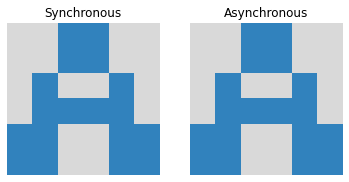

In [ ]:
plt.subplot(1,2,1); plt.imshow(np.reshape(xs,[6,6]), cmap='tab20c_r'); plt.title('Synchronous'); plt.axis('off');
plt.subplot(1,2,2); plt.imshow(np.reshape(xa,[6,6]), cmap='tab20c_r'); plt.title('Asynchronous'); plt.axis('off');

# **Traveling** **Salesman** **Problem**


In [ ]:
# Number of cities
N = 10

city_x = np.random.rand((10))
city_y = np.random.rand((10))

print('The co-ordinates of the 10 cities are:')
for city in zip(city_x, city_y):
    print(city)

The co-ordinates of the 10 cities are:
(0.28708879223989514, 0.4909244073944623)
(0.24849356469454453, 0.1983503258901378)
(0.06564898710154676, 0.363568160347401)
(0.4919526172917188, 0.5092148737539381)
(0.534575366567767, 0.32832049537506014)
(0.5551297436710007, 0.792605477009375)
(0.4331157029439283, 0.7849211518388373)
(0.5361916040863303, 0.6054357830940065)
(0.8297858549930206, 0.11311786087049103)
(0.6291139235242328, 0.060152607963878224)


Text(0.5, 1.0, 'Map of cities')

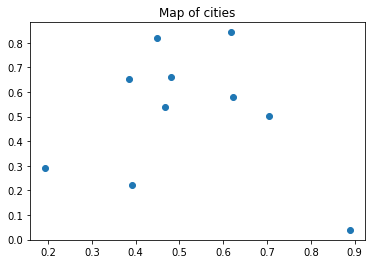

In [ ]:
plt.plot(city_x, city_y, 'o')
plt.title('Map of cities')

In [ ]:
d = np.zeros((N,N))
# Calculate distance matrix
for i in range(N):
    for j in range(N):
        d[i, j] = np.sqrt((city_x[i] - city_x[j])**2 + (city_y[i] - city_y[j])**2)

print(d);

[[0.         0.69505472 0.3676058  0.46739693 0.73959916 0.20977847
  0.55338629 0.58466236 0.40961806 0.51774165]
 [0.69505472 0.         0.33986621 0.22766583 0.84777492 0.65981348
  0.35091304 0.1696828  0.29949522 0.26226932]
 [0.3676058  0.33986621 0.         0.12379611 0.65358872 0.32425789
  0.24135735 0.27969392 0.14168097 0.16259868]
 [0.46739693 0.22766583 0.12379611 0.         0.74421891 0.44737161
  0.27538887 0.15902786 0.09533103 0.16472376]
 [0.73959916 0.84777492 0.65358872 0.74421891 0.         0.52984312
  0.49846561 0.8933185  0.7948066  0.60257348]
 [0.20977847 0.65981348 0.32425789 0.44737161 0.52984312 0.
  0.42045505 0.59754473 0.43142197 0.42627114]
 [0.55338629 0.35091304 0.24135735 0.27538887 0.49846561 0.42045505
  0.         0.40521428 0.35421427 0.11269484]
 [0.58466236 0.1696828  0.27969392 0.15902786 0.8933185  0.59754473
  0.40521428 0.         0.1757581  0.29382061]
 [0.40961806 0.29949522 0.14168097 0.09533103 0.7948066  0.43142197
  0.35421427 0.17575

In [ ]:
# Set parameters for network energy function
#A : controls the impact of connections between the nodes in the same column of the weight matrix.
#B : controls the impact of connections between the nodes in the same row of the weight matrix.
#C : controls the overall level of activation in the network.
#D : controls the input of the connection between b/w  neighboring nodes.

A = 500 #penalize short edges and encourage long edges.
B = 500 #penalize the intersection of edges. 
C = 1000 #encourage the edges to connect to each other in a cycle.
D = 500 #encourage the edges to connect to each other in a cycle.


alpha = 0.0001 #to control the strength of the weigth update during learning

In [ ]:
# x-v-value of each node, y-u-input potential, u0-gamma
def hopfield():
    u0 = 0.02
    toend = 0
    udao = np.zeros((N, N))
    ctr = 0
    while toend == 0:
        ctr += 1
        # U initialization
        #v - initial state of the network which will converge towards soln for TSP
        v = np.random.rand(N,N)
        #u - input potential of each node.
        u = np.ones([N, N])*(-u0*np.log(N-1)/2)

        u += u*0.91 
        #increased u by 91% to adjust fir the symmetry b/w input output  in the energy function.
        for _ in range(100000):
            for vx in range(N):
                for vi in range(N):
                    j1, j2, j3, j4 = 0, 0, 0, 0
                    #these are the parameters calculated to update the u of node in the direction that will reduce the energy function.

                    
                    # derivative 1 (sum over columns j!=vi)
                    for j in range(N):
                        if j != vi:
                            j1 += v[vx, j]
                    j1 *= -A

                    # derivative 2 (sum over rows y!=x)
                    for y in range(N):
                        if y != vx:
                            j2 += v[y, vi]
                    j2 *= -B

                    # derivative 3 (overall sum)
                    j3 = np.sum(v)
                    j3 = -C*(j3-N)

                    # derivative 4
                    for y in range(N):
                        if y != vx:
                            if vi == 0:
                                j4 += d[vx, y]*(v[y, vi+1]+v[y, N-1])
                            elif vi == N-1:
                                j4 += d[vx, y]*(v[y, vi-1]+v[y, 0])
                            else:
                                j4 += d[vx, y]*(v[y, vi+1]+v[y, vi-1])
                    j4 *= -D
                    udao[vx, vi] = -u[vx, vi]+j1+j2+j3+j4


            

            # update status and derivatives
             #status of the system is updated by adding the derivative of the energy function with respect to the current status
            u = u + alpha*udao
           

               # calculates the output node value based on the input potential u using a sigmoidal activation function.
            v = (1+np.tanh(u/u0)) / 2
         


            # threshold
            # thresholding step is used to convert the output values from the Hopfield network to binary values.
            for vx in range(N):
                for vi in range(N):
                    if(v[vx, vi] < 0.7):
                        v[vx, vi] = 0
                    if(v[vx, vi] >= 0.7):
                        v[vx, vi]=1
            
        # testing whether solution is legal
        t1, t2, t3 = 0, 0, 0

        # require total of N-nodes with 1 value
        t1=0;
        for vx in range(N):
            for vi in range(N):
                t1+=v[vx, vi]

        # allow only one node in each row equal 1
        t2=0
        for x in range(N):
            for i in range(N-1):
                for j in range(i+1, N):
                    t2+=np.multiply(v[x, i], v[x, j])

        # allow only one node in each column equal 1
        t3=0
        for i in range(N):
            for x in range(N-1):
                for y in range(x+1, N):
                    t3+=np.multiply(v[x, i], v[y, i])

        # stop the loop after getting the valid solution
        if t1 == N and t2 == 0 and t3 == 0:
            toend = 1
        else:
            toend = 0

    return(v, ctr)

In [ ]:
def total_distance(v):
  #calculates the total distance of the path obtained by visiting the cities in the order specified by the input binary matrix 
   
    city_x_final = np.zeros((N+1))
    city_y_final = np.zeros((N+1))

    for j in range(N):
        for i in range(N):
            if v[i,j] == 1:
                city_x_final[j] = city_x[i]
                city_y_final[j] = city_y[i]

    city_x_final[N] = city_x_final[0]
    city_y_final[N] = city_y_final[0]

    # calculate the total distance
    td = 0
    for i in range(N-1):
        td += np.sqrt((city_x_final[i] - city_x_final[i+1])**2
                    + (city_y_final[i] - city_y_final[i+1])**2)
    td += np.sqrt((city_x_final[N-1] - city_x_final[0])**2
                + (city_y_final[N-1] - city_y_final[0])**2)
    
    return(td, city_x_final, city_y_final)

In [ ]:
v = np.zeros([N,N])

ct = 0

min_dist = 20
best_path = None

for i in range(10):
    v, steps = hopfield()
    td, _, _ = total_distance(v)
    print(f"Epoch {i}: Ran for {steps} steps, total distance {td}")
    if td < min_dist:
        min_dist = td
        best_path = v
print(min_dist)
print(best_path)
#If the total distance is less than the previous minimum distance, it updates the minimum distance and stores the binary matrix as the best path.

Epoch 0: Ran for 54 steps, total distance 2.712787959789945
Epoch 1: Ran for 47 steps, total distance 2.831384447500886
Epoch 2: Ran for 11 steps, total distance 2.5978993025955774
Epoch 3: Ran for 44 steps, total distance 2.9978891531953997
Epoch 4: Ran for 15 steps, total distance 2.817199140766037
Epoch 5: Ran for 16 steps, total distance 3.1621149141272875
Epoch 6: Ran for 11 steps, total distance 3.031675054732217
Epoch 7: Ran for 2 steps, total distance 2.9287119810998528
Epoch 8: Ran for 25 steps, total distance 3.117361607690662
Epoch 9: Ran for 4 steps, total distance 2.808816967159389
2.5978993025955774
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
#search for 1 column wise in  the best path matrix
def get_route(v):
    route = ""
    for j in range(v.shape[1]):
        route += str(np.argmax(v[:, j])) + ' -> '
        #For each column, it finds the row with the highest value (which will be 1 in the case of the Hopfield network), using the np.argmax() function.
#after the loop has finished, it appends the index of the first city to the route string to complete the tour.

    return (route + str(np.argmax(v[:, 0])))

In [ ]:
print(get_route(best_path))

2 -> 8 -> 7 -> 1 -> 3 -> 9 -> 6 -> 4 -> 5 -> 0 -> 2


In [ ]:
def get_route_indices(v):
    indices = []
    for j in range(v.shape[1]):
        indices.append(np.argmax(v[:, j]))
    indices.append(np.argmax(v[:, 0]))
    return indices

In [ ]:
indices = get_route_indices(best_path)
print(indices)

[2, 8, 7, 1, 3, 9, 6, 4, 5, 0, 2]


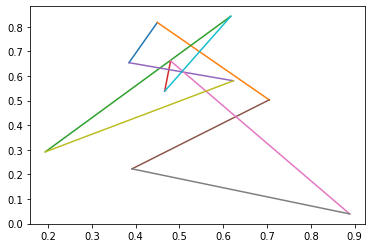

In [ ]:
# indices = get_route_indices(best_path)
for i in indices[1:]:
    plt.plot([city_x[i], city_x[i-1]], [city_y[i], city_y[i-1]], '-')
plt.show()